In [397]:
dir = 'D:/projects/datascience/bfu-ml-labs/lab_2'

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mtr

In [399]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(f'{dir}/housing.csv', delimiter='\s+', names=col_names)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [401]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Фиксируем количество столбцов, меняем количество данных

Будем везде брать все доступные признаки (столбцы). С помощью `train_test_split` разобьём исходный массив данных на обучающую и проверочную части в соотношении 75:25. После чего обучим 3 модели: первой скормим 5% всех доступных обучающих данных, второй -- 50%, третьей -- все обучающие данные.

In [402]:
# Сюда будем сохранять результаты экспериментов (метрики каждой модели) для визуализации в конце.
mtr_records_names = []
mtr_records_r2 = []
mtr_records_mape = []
mtr_records_rmse = []

In [403]:
train, test = train_test_split(df, random_state=123, test_size=0.25)
train.shape, test.shape

((379, 14), (127, 14))

In [404]:
X_train = train.drop('MEDV', axis=1)
y_train = train[['MEDV']]

In [405]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
335,0.03961,0.0,5.19,0,0.515,6.037,34.5,5.9853,5,224.0,20.2,396.90,8.01
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403.0,14.7,292.29,14.43
241,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666.0,20.2,393.74,21.78


In [406]:
y_train.head()

,MEDV
335,21.1
142,13.4
170,17.4
241,20.1
379,10.2


In [407]:
X_test = test.drop('MEDV', axis=1)
y_test = test[['MEDV']]

### 5% данных

In [408]:
stop = int(len(X_train) * 0.05)
model = LinearRegression()
model.fit(X_train[:stop], y_train[:stop])
y_test_pred = model.predict(X_test)

mtr_records_names.append('13 cols, 5% rows')
mtr_records_r2.append(mtr.r2_score(y_test, y_test_pred))
mtr_records_mape.append(mtr.mean_absolute_percentage_error(y_test, y_test_pred))
mtr_records_rmse.append(np.sqrt(mtr.mean_squared_error(y_test, y_test_pred)))
mtr_records_r2[-1], mtr_records_mape[-1], mtr_records_rmse[-1]

(-18.476745344994537, 1.1236743282343877, 39.211450757049086)

### 50% данных

In [409]:
stop = int(len(X_train) * 0.5)
model = LinearRegression()
model.fit(X_train[:stop], y_train[:stop])
y_test_pred = model.predict(X_test)

mtr_records_names.append('13 cols, 50% rows')
mtr_records_r2.append(mtr.r2_score(y_test, y_test_pred))
mtr_records_mape.append(mtr.mean_absolute_percentage_error(y_test, y_test_pred))
mtr_records_rmse.append(np.sqrt(mtr.mean_squared_error(y_test, y_test_pred)))
mtr_records_r2[-1], mtr_records_mape[-1], mtr_records_rmse[-1]

(0.6815342699112176, 0.17183115904591748, 5.0140200961535)

### 100% данных

In [410]:
stop = int(len(X_train) * 1)
model = LinearRegression()
model.fit(X_train[:stop], y_train[:stop])
y_test_pred = model.predict(X_test)

mtr_records_names.append('13 cols, 100% rows')
mtr_records_r2.append(mtr.r2_score(y_test, y_test_pred))
mtr_records_mape.append(mtr.mean_absolute_percentage_error(y_test, y_test_pred))
mtr_records_rmse.append(np.sqrt(mtr.mean_squared_error(y_test, y_test_pred)))
mtr_records_r2[-1], mtr_records_mape[-1], mtr_records_rmse[-1]

(0.6862448857295766, 0.1663187393371411, 4.97679926947114)

# Промежуточные результаты

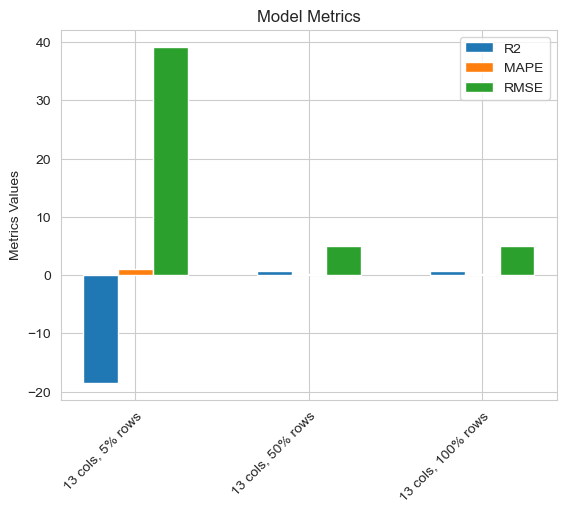

In [411]:
hist_x = np.arange(len(mtr_records_names))
bar_width = 0.2

fig, ax = plt.subplots()
bar1 = ax.bar(hist_x - bar_width, mtr_records_r2, bar_width, label='R2')
bar2 = ax.bar(hist_x, mtr_records_mape, bar_width, label='MAPE')
bar3 = ax.bar(hist_x + bar_width, mtr_records_rmse, bar_width, label='RMSE')

ax.set_xticks(hist_x)
ax.set_xticklabels(mtr_records_names, rotation=45, rotation_mode="anchor", ha="right")

ax.legend()

ax.set_ylabel('Metrics Values')
ax.set_title('Model Metrics')

plt.show()

In [412]:
table = { 'Model': mtr_records_names, 'R2': mtr_records_r2, 'MAPE': mtr_records_mape, 'RMSE': mtr_records_rmse }
pd.DataFrame(table)

,Model,R2,MAPE,RMSE
0,"13 cols, 5% rows",-18.476745,1.123674,39.211451
1,"13 cols, 50% rows",0.681534,0.171831,5.014020
2,"13 cols, 100% rows",0.686245,0.166319,4.976799


При использовании всех доступных признаков, получаем следующую картину:
* если данных чрезвычайно мало (для данной задачи -- менее 10% доступного объёма), то модель справляется даже хуже, чем модель, которая бы просто при каждом предсказании выдавала среднее значение ответов из обучающих данных (R2 < 0);
* если взять половину доступных данных, то модель справляется "неплохо", и в целом угадывает стоимость зданий с точностью около 17.2%;
* если удвоить количество данных (т.е. взять все доступные), то качество модели улучшится, но очень незначительно по сравнению со второй моделью (у которой была только половина данных), "доверительный интервал" сузится до 16.6%.

# Фиксируем количество данных, меняем количество столбцов

Будем везде брать все доступные данные (строки). Обучим 3 модели: первой скормим 2 признака, второй -- 7, третьей -- все доступные (13).

Сначала есть смысл определить, какие признаки кажется более важными. Нет смысла строить модель на малом количестве признаков, если нет даже никакой надежды на то, что эти признаки хоть как-то влияют на результат. Для этого вычислим попарные коэффициенты корреляции для каждого из признаков и ответа, возьмём их по модулю (т.к. нам важен лишь сам факт важности признака, а в какую сторону он склоняет ответ -- уже не интересует) и воспользуемся `heatmap` для визуализации.

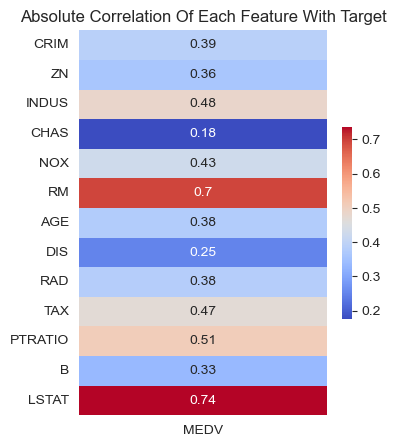

In [413]:
abscorr_mat = df.corr().abs()
abscorr_with_target = abscorr_mat[['MEDV']].drop('MEDV', axis=0)
plt.figure(figsize=(4, 5))
sns.heatmap(abscorr_with_target, annot=True, cmap='coolwarm', cbar_kws={"shrink": 0.5})
plt.title("Absolute Correlation Of Each Feature With Target")
plt.show()

Наибольшая **линейная** зависимость с целевым столбцом наблюдается у признаков `RM` (среднее число комнат в жилье) и `LSTAT` (% более низкого статуса населения). Мы строим **линейную** регрессию, так что для нас это признак того, что использование этих столбцов может дать хорошие результаты при предсказывании. С них и начнём.

### 2 признака

In [420]:
features_cut = ['RM', 'LSTAT']
X_train_cut = X_train[features_cut]
X_test_cut = X_test[features_cut]

model = LinearRegression()
model.fit(X_train_cut.values, y_train.values)
y_test_pred = model.predict(X_test_cut.values)

mtr_records_names.append('2 cols, 100% rows')
mtr_records_r2.append(mtr.r2_score(y_test, y_test_pred))
mtr_records_mape.append(mtr.mean_absolute_percentage_error(y_test, y_test_pred))
mtr_records_rmse.append(np.sqrt(mtr.mean_squared_error(y_test, y_test_pred)))
mtr_records_r2[-1], mtr_records_mape[-1], mtr_records_rmse[-1]

(0.528860036305964, 0.22051773002352867, 6.098593546186116)

В двумерном случае (2 признака, 1 целевая переменная) можно визуализировать данные и работу нашей модели на них, подобно одномерному случаю (с одним признаком, как было в предыдущих лабораторных работах). В этом случае график будет трёхмерным, а вместо регрессионной **прямой** будет целая **плоскость**.

In [421]:
%matplotlib notebook

In [422]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_cut['RM'], X_train_cut['LSTAT'], y_train, c='blue', marker='o', alpha=0.25)

f1_range = np.linspace(X_train_cut['RM'].min(), X_train_cut['RM'].max(), num=10)
f2_range = np.linspace(X_train_cut['LSTAT'].min(), X_train_cut['LSTAT'].max(), num=10)
f1_grid, f2_grid = np.meshgrid(f1_range, f2_range)
X_grid = np.c_[f1_grid.ravel(), f2_grid.ravel()]
y_grid = model.predict(X_grid).reshape(f1_grid.shape)

ax.plot_surface(f1_grid, f2_grid, y_grid, color='red', alpha=0.125)

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV (target)')
ax.set_title('2 cols, 100% rows')
ax.view_init(10, -120)

plt.show()

<IPython.core.display.Javascript object>

In [423]:
%matplotlib inline

### 7 признаков

In [424]:
features_cut = ['RM', 'LSTAT', 'INDUS', 'PTRATIO', 'TAX', 'NOX', 'CRIM']
X_train_cut = X_train[features_cut]
X_test_cut = X_test[features_cut]

model = LinearRegression()
model.fit(X_train_cut.values, y_train.values)
y_test_pred = model.predict(X_test_cut.values)

mtr_records_names.append('7 cols, 100% rows')
mtr_records_r2.append(mtr.r2_score(y_test, y_test_pred))
mtr_records_mape.append(mtr.mean_absolute_percentage_error(y_test, y_test_pred))
mtr_records_rmse.append(np.sqrt(mtr.mean_squared_error(y_test, y_test_pred)))
mtr_records_r2[-1], mtr_records_mape[-1], mtr_records_rmse[-1]

(0.5844909339228557, 0.19467964205755536, 5.7272345569551675)

### Все 13 признаков

Модель, использующая все доступные признаки (столбцы) и все доступные данные (строки) уже строилась ранее, в пункте *"100% данных"*. Не будем повторяться здесь.

# Итоговые результаты

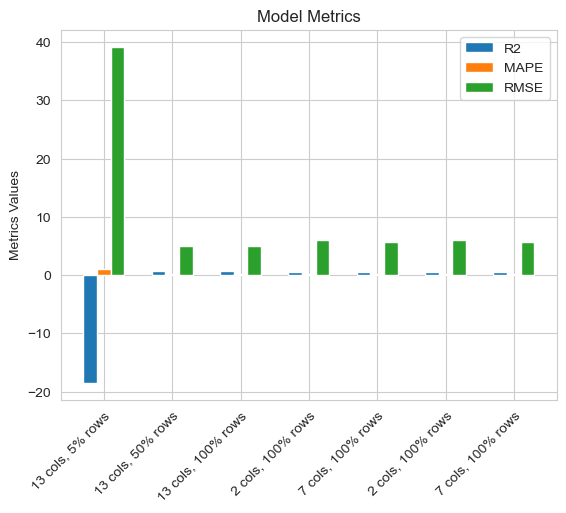

In [425]:
hist_x = np.arange(len(mtr_records_names))
bar_width = 0.2

fig, ax = plt.subplots()
bar1 = ax.bar(hist_x - bar_width, mtr_records_r2, bar_width, label='R2')
bar2 = ax.bar(hist_x, mtr_records_mape, bar_width, label='MAPE')
bar3 = ax.bar(hist_x + bar_width, mtr_records_rmse, bar_width, label='RMSE')

ax.set_xticks(hist_x)
ax.set_xticklabels(mtr_records_names, rotation=45, rotation_mode="anchor", ha="right")

ax.legend()

ax.set_ylabel('Metrics Values')
ax.set_title('Model Metrics')

plt.show()

In [426]:
table = { 'Model': mtr_records_names, 'R2': mtr_records_r2, 'MAPE': mtr_records_mape, 'RMSE': mtr_records_rmse }
pd.DataFrame(table)

,Model,R2,MAPE,RMSE
0,"13 cols, 5% rows",-18.476745,1.123674,39.211451
1,"13 cols, 50% rows",0.681534,0.171831,5.014020
2,"13 cols, 100% rows",0.686245,0.166319,4.976799
3,"2 cols, 100% rows",0.528860,0.220518,6.098594
4,"7 cols, 100% rows",0.584491,0.194680,5.727235
5,"2 cols, 100% rows",0.528860,0.220518,6.098594
6,"7 cols, 100% rows",0.584491,0.194680,5.727235


### Подведём итоги

Лучшие результаты по всем показателям **в данном случае** дала модель `Model 2: 13 cols, 100% rows`, т.е. линейная регрессия, обученная на всех доступных в исходном обучающем датасете данных и признаках (на всех строках и столбцах).

Модель `Model 1: 13 cols, 50% rows` подобралась к ней по качеству ближе всех -- различий почти нет, при этом ей понадобилось вдвое меньше данных (строк).

Однако это вовсе не говорит о том, что количество строк не влияет на результат. Просто возрастание точности с изменением числа строк нелинейно. Так, модель `Model 0: 13 cols, 5% rows`, обученная всего на 5% доступных строках, дала крайне плохой результат и вообще непригодна для использования: даже гипотетическая модель, которая бы просто всегда в качестве ответа выдавала среднее значение `y` из тренировочных данных, дала бы лучший результат.

С другой стороны, модель `Model 3: 2 cols, 100% rows` весьма неплохо справилась с результатом (хоть уже и значительно хуже 2-ой и 1-ой моделей), при том что использовала всего 2 признака из 13 доступных. Здесь, конечно, сыграл роль грамотный подбор признаков: эти 2 столбца были выбраны неслучайно -- а с учётом таблицы корреляции, которая была предварительно построена. Если бы эти столбцы были взяты наобум, результат бы, наверняка, получился хуже. *Проверим это, взяв два "неудачных" признака в качестве единственных доступных для модели.*

In [427]:
features_cut = ['CRIM', 'NOX']
X_train_cut = X_train[features_cut]
X_test_cut = X_test[features_cut]

model = LinearRegression()
model.fit(X_train_cut.values, y_train.values)
y_test_pred = model.predict(X_test_cut.values)

mtr.r2_score(y_test, y_test_pred), mtr.mean_absolute_percentage_error(y_test, y_test_pred), np.sqrt(mtr.mean_squared_error(y_test, y_test_pred))

(0.18957356971000228, 0.2531361201117329, 7.998554638630438)

Действительно, теперь модель, у которой снова, казалось бы, для обучения было 2 столбца и целый набор данных, дала очень плохой результат по всем метрикам.

Таким образом, для **данной задачи** и, пожалуй, для многих задач машинного обучения (как минимум линейной регрессии),
* данных (строк) должно быть **достаточно**: если их слишком мало, то модель будет плохо справляться независимо от того, сколько ей было скормлено признаков; но если их слишком много, то модель просто будет очень долго обучаться, при этом точность лучше практически не станет (по сравнению с моделью с "хорошим" количеством строк, поданных для обучения);
* для признаков (столбцов), как мне кажется, лучше перестраховаться и всегда взять как можно больше: так можно гарантировать, что не будут упущены никакие важные детали; с другой стороны, если в исходных данных столбцов ну слишком много, то есть смысл повозиться с данными и предварительно изучить, какие в них есть связи: так можно оптимизировать время обучения, не потеряв в качестве модели, благодаря отбрасыванию слабо влияющих на результат признаков.

# TL;DR

### И строк, и столбцов в данных должно быть не слишком мало, но и не слишком много.


Напоследок... Отдельно построим сравнительную гистограмму, в которой отобразим только значения метрики R2 для разных моделей. В данном случае мы можем себе это позволить, так как у всех моделей "положительное" изменение в R2 вело также к "положительным" изменениям в MAPE и RMSE, т.е. обобщающая способность модели в целом улучшалась (ухудшалась) во всех случаях одновременно с её обобщающей способностью на всём наборе данных целиком (с учётом выбросов).

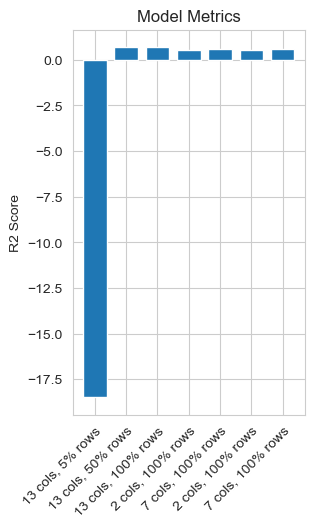

In [428]:
hist_x = np.arange(len(mtr_records_names))
bar_width = 0.75

fig, ax = plt.subplots(figsize=(3, 5))
bar1 = ax.bar(hist_x, mtr_records_r2, bar_width, label='R2')
ax.set_xticks(hist_x)
ax.set_xticklabels(mtr_records_names, rotation=45, rotation_mode="anchor", ha="right")

ax.set_ylabel('R2 Score')
ax.set_title('Model Metrics')

plt.show()

Итак, модель `Model 2: 13 cols, 100% rows` оказалась лучшей.